In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

<H2>Load Data</H2>

In [2]:
# load abalone database
data = pd.read_csv('corona.csv')
data.sample(n=5)

,fever,bodypain,age,runnynose,diffbreath,infected
1821,98.721860,0,71,1,-1,0
1429,102.416542,1,79,1,-1,1
318,102.600453,0,34,0,1,1
415,101.989453,0,80,0,-1,0
635,101.967805,1,64,0,-1,0


In [3]:
data

,fever,bodypain,age,runnynose,diffbreath,infected
0,99.329862,0,26,1,-1,0
1,98.115263,1,61,1,0,1
2,99.918088,1,13,0,-1,0
3,101.344456,1,55,1,0,1
4,100.056678,1,37,0,1,0
...,...,...,...,...,...,...
1994,101.671891,1,33,1,-1,1
1995,101.673979,1,38,0,1,1
1996,99.804430,1,76,0,-1,1
1997,98.565582,1,62,1,-1,1


In [4]:
data.groupby('infected').infected.count()

infected
0     992
1    1007
Name: infected, dtype: int64

In [5]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fever       1999 non-null   float64
 1   bodypain    1999 non-null   int64  
 2   age         1999 non-null   int64  
 3   runnynose   1999 non-null   int64  
 4   diffbreath  1999 non-null   int64  
 5   infected    1999 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 93.8 KB


In [6]:
#X = data[['fever', 'bodypain', 'age', 'runnynose', 'diffbreath']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X = data.drop('infected', axis='columns')
X.head()

,fever,bodypain,age,runnynose,diffbreath
0,99.329862,0,26,1,-1
1,98.115263,1,61,1,0
2,99.918088,1,13,0,-1
3,101.344456,1,55,1,0
4,100.056678,1,37,0,1


In [7]:
y = data.infected
y.head()

0    0
1    1
2    0
3    1
4    0
Name: infected, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [9]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.49833333333333335

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

Accuracy:  0.49833333333333335


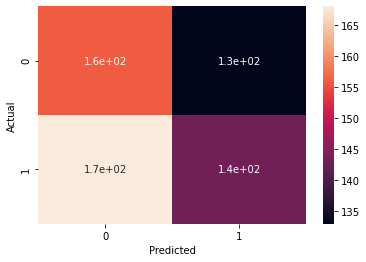

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [12]:
#Support Vector Machine
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.5

In [13]:
#Support Vector Machine
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)

Accuracy:  0.5


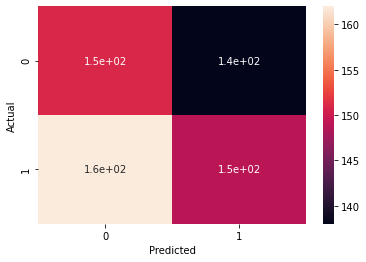

In [14]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [15]:
#Random Forest
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5216666666666666

In [16]:
#Random Forest
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

Accuracy:  0.5633333333333334


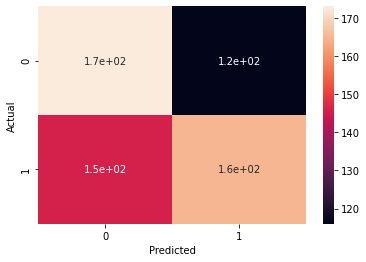

In [17]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [18]:
#K-fold Cross validation

In [19]:
X = X.to_numpy()
X

array([[ 99.32986249,   0.        ,  26.        ,   1.        ,
         -1.        ],
       [ 98.11526304,   1.        ,  61.        ,   1.        ,
          0.        ],
       [ 99.9180884 ,   1.        ,  13.        ,   0.        ,
         -1.        ],
       ...,
       [ 99.80443007,   1.        ,  76.        ,   0.        ,
         -1.        ],
       [ 98.56558173,   1.        ,  62.        ,   1.        ,
         -1.        ],
       [101.2358456 ,   0.        ,  14.        ,   1.        ,
          0.        ]])

In [20]:
y = y.to_numpy()
y

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [21]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [22]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]
    scores_logistic.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [23]:
scores_logistic

[0.4767616191904048, 0.5315315315315315, 0.47897897897897895]

In [24]:
scores_svm

[0.48875562218890556, 0.4864864864864865, 0.484984984984985]

In [25]:
scores_rf

[0.4947526236881559, 0.515015015015015, 0.503003003003003]

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=3)

array([0.47826087, 0.53153153, 0.47747748])

In [28]:
cross_val_score(SVC(gamma='auto'), X, y,cv=3)

array([0.48875562, 0.48648649, 0.48498498])

In [29]:
cross_val_score(RandomForestClassifier(n_estimators=40), X, y,cv=3)

array([0.50824588, 0.51201201, 0.5015015 ])